# Week 1 excercise

Xiaochen (Raynard) Zhang

In [2]:
import numpy as np
from PIL import Image

In [7]:
img = Image.open("/Users/salvor/Pictures/pic.jpg").resize((320,200))

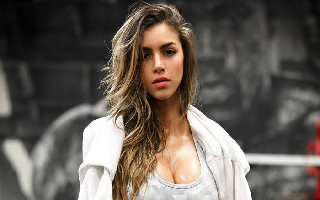

In [8]:
img

In [9]:
img_arr = np.array(img)

In [11]:
img_arr.shape

(200, 320, 3)

In [15]:
from matplotlib import pyplot as plt

### Q1
Write a computer program capable of reducing the number of intensity levels in an image from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.

In [18]:
def quantize(scale):
    return plt.imshow((img_arr/scale).astype(np.int16)*scale)

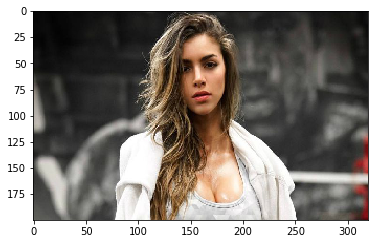

In [19]:
quantize(1)

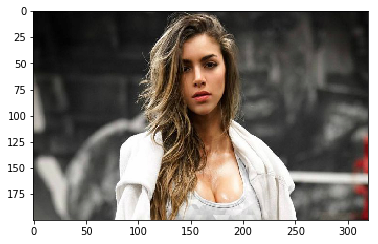

In [20]:
quantize(2)

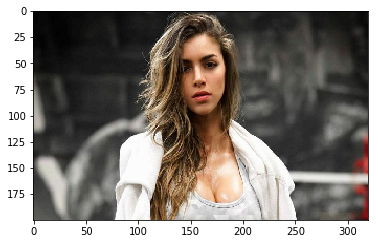

In [22]:
quantize(4)

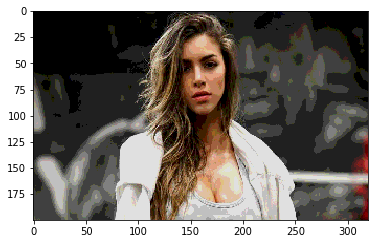

In [25]:
quantize(32)

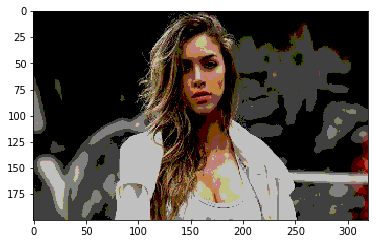

In [28]:
quantize(64)

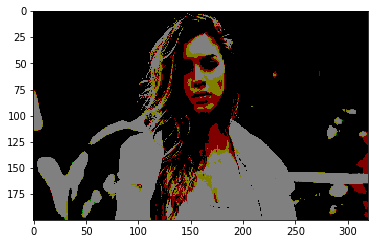

In [26]:
quantize(128)

### Q2
Using any programming language you feel comfortable with (it is though recommended to use the provided free Matlab), load an image and then perform a simple spatial 3x3 average of image pixels. In other words, replace the value of every pixel by the average of the values in its 3x3 neighborhood. If the pixel is located at (0,0), this means averaging the values of the pixels at the positions (-1,1), (0,1), (1,1), (-1,0), (0,0), (1,0), (-1,-1), (0,-1), and (1,-1). Be careful with pixels at the image boundaries. Repeat the process for a 10x10 neighborhood and again for a 20x20 neighborhood. Observe what happens to the image (we will discuss this in more details in the very near future, about week 3).

In [29]:
print(img_arr.shape)

(200, 320, 3)


In [ ]:
plt.imshow(img_arr)

In [84]:
def average(scale = 3):
    img_arr_ = np.copy(img_arr)
    divid = scale **2
    nb = scale//2 #neighbour in 1 direction
    sum_shape = list(img_arr.shape)
    sum_shape[0] -=scale
    sum_shape[1] -=scale
    sum_img = np.zeros(sum_shape,np.float64)
    ct = 0
    for i in range(scale):
        for j in range(scale):
            sum_img+=img_arr[i:-(scale-i),j:-(scale-j),:]/divid
            ct+=1
    print(ct)
    return sum_img/255


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9


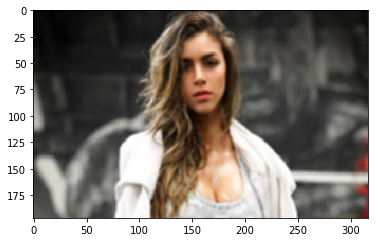

In [85]:
plt.imshow(average(3))

25


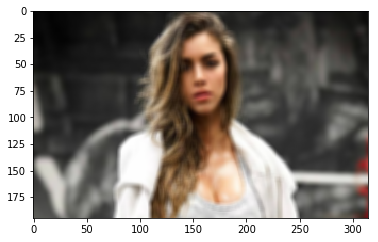

In [86]:
plt.imshow(average(5))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


100


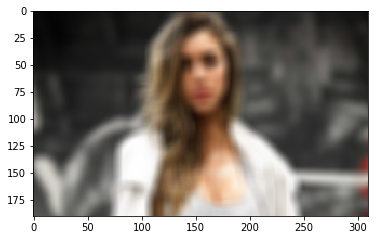

In [88]:
plt.imshow(average(10))

400


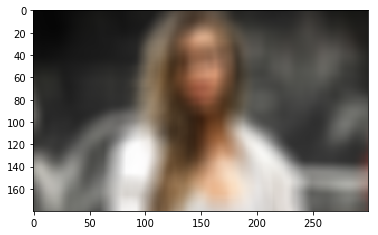

In [89]:
plt.imshow(average(20))

### Q3

In [201]:
import math

Rotate the image by 45 and 90 degrees (Matlab provides simple command lines for doing this).

Rotate 90 degree CCW is the following transformation

In [239]:
T90 = np.array([
    [0,-1],
    [1,0],
])

Rotate 45 degree CCW is the following transformation

In [240]:
sqrt2 = math.sqrt(2)

T45 = np.array([
    [1/sqrt2, -1/sqrt2],
    [1/sqrt2, 1/sqrt2],
])

In [241]:
Tshear = np.array([
    [1,1],
    [0,1],
])

In [254]:
def rotate(T):
    """
    T is the rotate transform matrix
    """
    h,w,c = img_arr.shape
    
    imap = np.zeros((h,w,2))
    imap[...,0] = np.expand_dims(np.arange(h),1).repeat(w,1)
    imap[...,1] = np.expand_dims(np.arange(w),0).repeat(h,0)
    imapT = imap@T
    new_h_mid = (imapT[...,0].max()-imapT[...,0].min())/2
    new_w_mid = (imapT[...,1].max()-imapT[...,1].min())/2
#     newmap = (imapT+[h//2-new_h_mid,w//2-new_w_mid]).astype(np.int16)
    newmap = imapT.astype(np.int16)
    maxpixel = np.expand_dims(np.expand_dims(np.array([h,w]),axis=0),axis=0)\
    .repeat(h, axis=0)\
    .repeat(w, axis=1)
    newmap_loop = newmap//maxpixel
    newmap -= newmap_loop*maxpixel

    newimg = np.zeros_like(img_arr)
    for i in range(h):
        for j in range(w):
            try:
                newidx = newmap[i,j]
                newimg[i,j] = img_arr[newidx[0],newidx[1]]
            except:
                # remain black
                pass

    return newimg/255

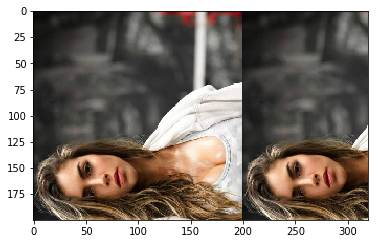

In [255]:
plt.imshow(rotate(T90))

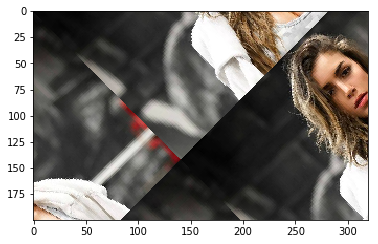

In [256]:
plt.imshow(rotate(T45))

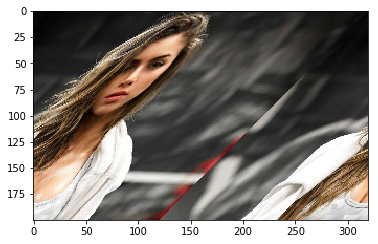

In [257]:
plt.imshow(rotate(Tshear))

### Q4

For every 3 \times 33×3 block of the image (without overlapping), replace all corresponding 9 pixels by their average. This operation simulates reducing the image spatial resolution. Repeat this for 5 \times 55×5 blocks and 7 \times 77×7 blocks. If you are using Matlab, investigate simple command lines to do this important operation.

The key is to **reshape** and implement average

In [129]:
def blockAverage(scale = 3):
    img_arr_ = np.copy(img_arr)
    h,w,c = img_arr_.shape
    img_arr_ = img_arr_[h%scale:,w%scale:,:]
    h,w,c = img_arr_.shape
    avg_map = img_arr_.reshape(h//scale,scale,w//scale,scale,c)\
    .mean(axis=1,keepdims = True).repeat(scale,axis=1)\
    .mean(axis=3,keepdims = True).repeat(scale,axis=3)
    result_arr = avg_map.reshape(h,w,c)
    return result_arr/255

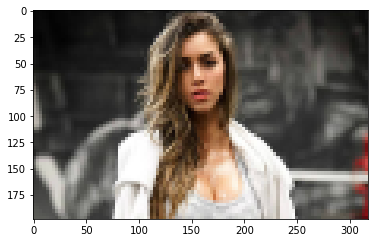

In [130]:
plt.imshow(blockAverage(3))

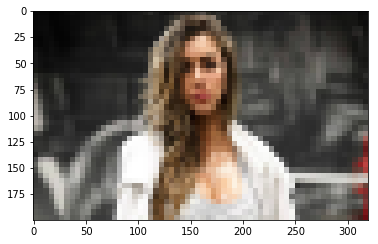

In [131]:
plt.imshow(blockAverage(5))

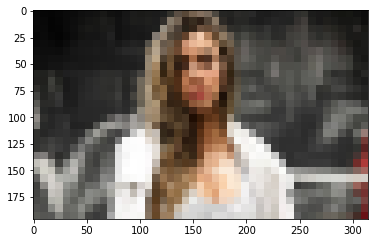

In [132]:
plt.imshow(blockAverage(7))